<a href="https://colab.research.google.com/github/sachsac/Predictions_of_Sales/blob/main/Project_1_Part_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Cleaning Steps

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
filename = '/content/drive/MyDrive/Coding Dojo/data set/sales_predictions.csv'
sales_predictions = pd.read_csv(filename)

In [2]:
#every grocery store is "small", Supermarkets can be anything. probably OK to delete this column as well
sales_predictions.drop(columns = ['Outlet_Size', 'Item_Weight'], inplace = True)
sales_predictions
sales_predictions.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [3]:
#Let's simplify, supermarket vs grocery
sales_predictions.loc[sales_predictions['Outlet_Type'] == 'Supermarket Type1', 'Outlet_Type'] = 'Supermarket'
sales_predictions.loc[sales_predictions['Outlet_Type'] == 'Supermarket Type2', 'Outlet_Type'] = 'Supermarket'
sales_predictions.loc[sales_predictions['Outlet_Type'] == 'Supermarket Type3', 'Outlet_Type'] = 'Supermarket'
sales_predictions.value_counts('Outlet_Type')

Outlet_Type
Supermarket      7440
Grocery Store    1083
dtype: int64

In [4]:
#combining unique values into Lowfat vs Regular
sales_predictions.loc[sales_predictions['Item_Fat_Content'] == 'LF', 'Item_Fat_Content'] = 'Low Fat'
sales_predictions.loc[sales_predictions['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'Regular'
sales_predictions.loc[sales_predictions['Item_Fat_Content'] == 'low fat', 'Item_Fat_Content'] = 'Low Fat'
sales_predictions.value_counts('Item_Fat_Content')

Item_Fat_Content
Low Fat    5517
Regular    3006
dtype: int64

In [5]:
grocery_store = sales_predictions[sales_predictions['Outlet_Type'] == 'Grocery Store']
supermarkets = sales_predictions[sales_predictions['Outlet_Type'] != 'Grocery Store']

# For Data Viz

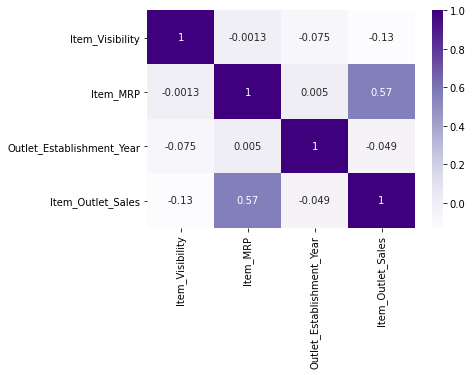

In [6]:
#heatmap first to indicate some relationships
corr = sales_predictions.corr()
sns.heatmap(corr, cmap = 'Purples', annot = True);
#moderate relationship between Item_Outlet_Sales and Item_MRP

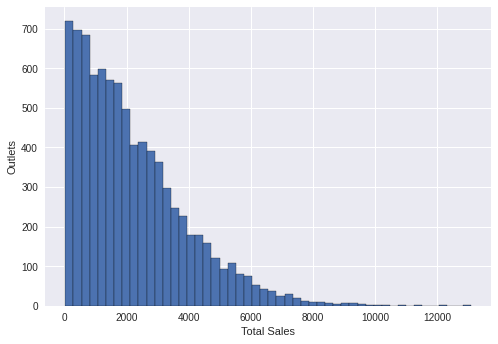

In [28]:
#item outlet sales histogram
plt.style.use('seaborn')
sales_predictions['Item_Outlet_Sales'].hist(bins = 50,
                                         edgecolor='black');
plt.xlabel('Total Sales');
plt.ylabel('Outlets');

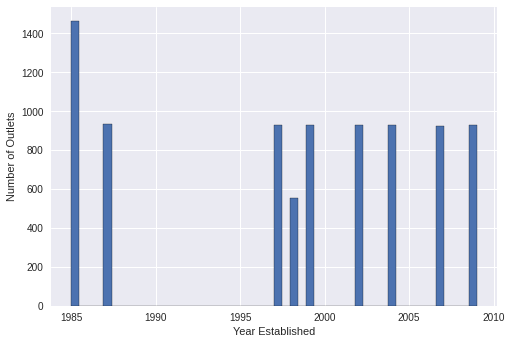

In [40]:
#how spread out were the locations founded?
plt.style.use('seaborn')
sales_predictions['Outlet_Establishment_Year'].hist(bins = 50,
                                                    edgecolor='black');
plt.xlabel('Year Established');
plt.ylabel('Number of Outlets');

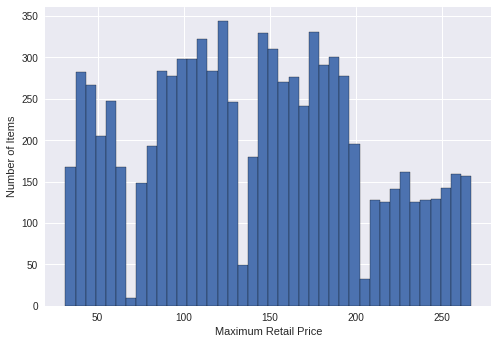

In [63]:
#MRPs histogram w/ Outlet Sales
plt.style.use('seaborn')
sales_predictions['Item_MRP'].hist(bins = 40,
                                         edgecolor='black');
plt.xlabel('Maximum Retail Price');
plt.ylabel('Number of Items');

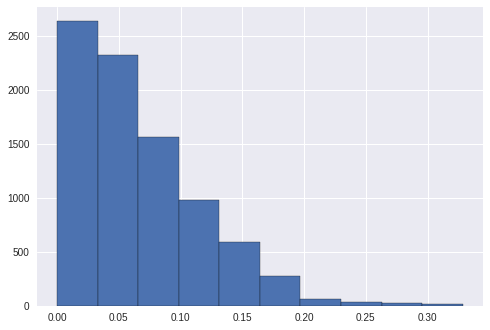

In [46]:
sales_predictions['Item_Visibility'].hist(bins = 10,
                                          edgecolor = 'black');
#more items have lower visibility

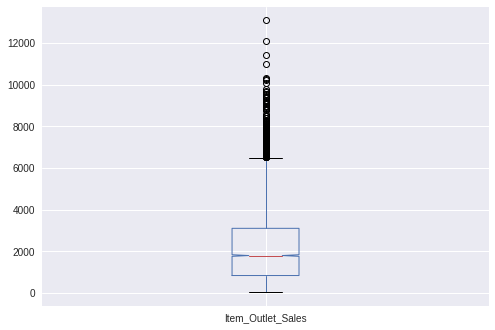

In [43]:
#notched
sales_predictions.boxplot(column = 'Item_Outlet_Sales', notch = True);
#it doesn't seem to make sense how many outliers there are, data is likely right skewed (confirmed by histogram)
#however, outliers may not mean they are not erroneous or relevant, but just that they are far from my mean statistically.

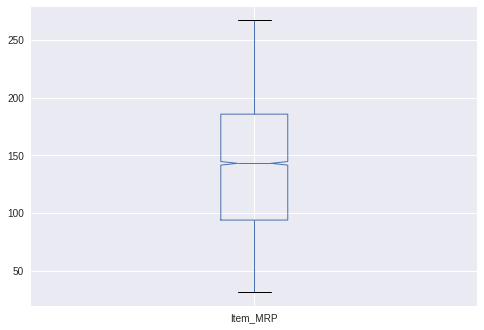

In [44]:
#MRP
sales_predictions.boxplot(column= 'Item_MRP', notch = True);
#no outliers!

Extras

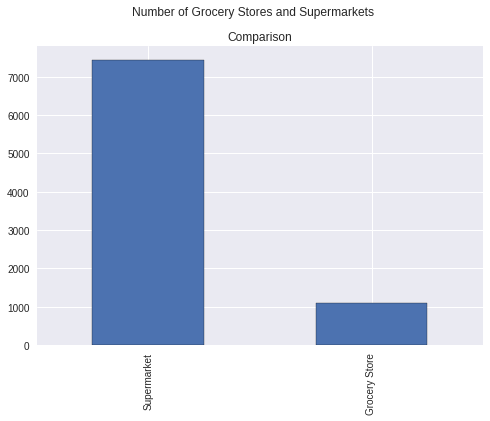

In [60]:
sales_predictions['Outlet_Type'].value_counts().plot(kind = 'bar',
                                                     edgecolor = 'black');
plt.title('Comparison');
plt.suptitle('Number of Grocery Stores and Supermarkets');

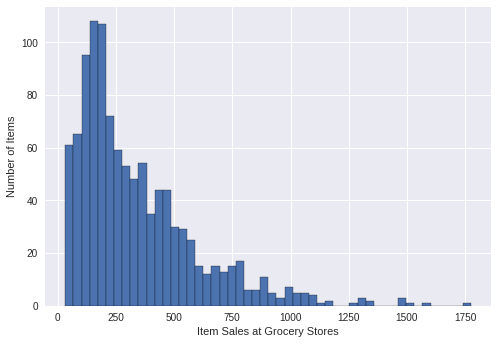

In [10]:
#Just Grocery
plt.style.use('seaborn')
grocery_store['Item_Outlet_Sales'].hist(bins = 50,
                                         edgecolor='black');
plt.xlabel('Item Sales at Grocery Stores');
plt.ylabel('Number of Items');

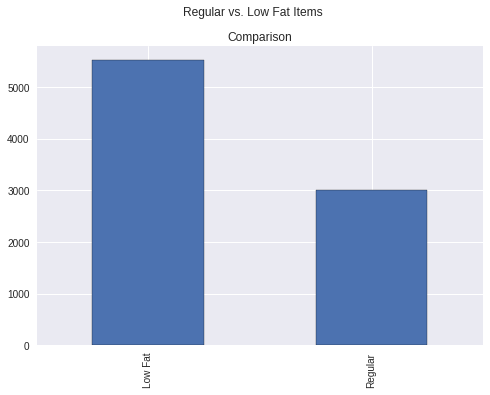

In [61]:
plt.title('Comparison');
plt.suptitle('Regular vs. Low Fat Items');
sales_predictions['Item_Fat_Content'].value_counts().plot(kind = 'bar',
                                                          edgecolor = 'black');

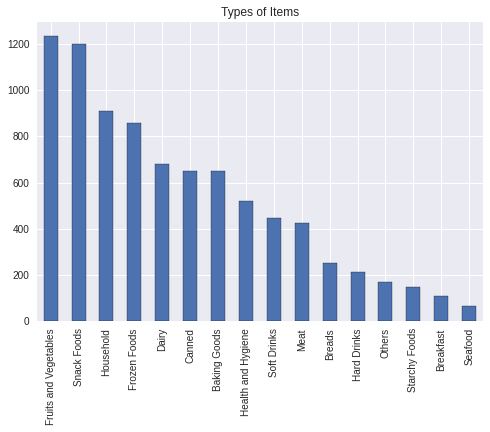

In [62]:
plt.title('Types of Items');
sales_predictions['Item_Type'].value_counts().plot(kind = 'bar',
                                                          edgecolor = 'black');

In [48]:
#as there is no over time function, or multiples of each product, line graphs would not be helpful for this data